In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_forbeslist_gdp = pd.read_parquet(f'../data/processed/forbeslist_gdp.parquet')

df_forbeslist_gdp.head()

,name,worth_amount_(BUSD),country,company_sector,company_name,age,GDP_BUSD,GDP_per_capita_USD
0,Jeff Bezos,112.0,United States,Technology,Amazon,54.0,20494100.0,62641.0
1,Bill Gates,90.0,United States,Technology,Microsoft,62.0,20494100.0,62641.0
2,Warren Buffett,84.0,United States,Finance and Investments,Berkshire Hathaway,87.0,20494100.0,62641.0
3,Mark Zuckerberg,71.0,United States,Technology,Facebook,33.0,20494100.0,62641.0
4,Charles Koch,60.0,United States,Diversified,Koch Industries,82.0,20494100.0,62641.0


In [3]:
#5 richest people of the list given the country.

def richest_people(dataframe, country):
    filter_country = dataframe['country'] == country
    result = dataframe[filter_country].nlargest(5, 'worth_amount_(BUSD)')
    return result

In [38]:
plot1 = richest_people(df_forbeslist_gdp, 'Mexico')

In [39]:
plot1

,name,worth_amount_(BUSD),country,company_sector,company_name,age,GDP_BUSD,GDP_per_capita_USD
639,Alberto Bailleres Gonzalez,10.7,Mexico,Metals & Mining,mining,86.0,1223810.0,9698.0
640,Maria Asuncion Aramburuzabala,5.9,Mexico,Food and Beverage,"beer, investments",55.0,1223810.0,9698.0
641,Antonio Del Valle Ruiz,3.4,Mexico,Manufacturing,chemicals,79.0,1223810.0,9698.0
642,Carlos Hank Rhon,2.0,Mexico,Diversified,banking,70.0,1223810.0,9698.0
643,Emilio Azcarraga Jean,1.7,Mexico,Media & Entertainment,TV broadcasting,50.0,1223810.0,9698.0


In [40]:
label = plot1['name']
BUSD = plot1['worth_amount_(BUSD)']

In [41]:
def plot1_bar_x():
    index = np.arange(len(label))
    plt.bar(index, BUSD)
    plt.ylabel('Billions of USD', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    country = plot1['country'].unique()[0]
    plt.title(f'The 5 richest people in {country} according to Forbes List (2018)')
    plt.show()

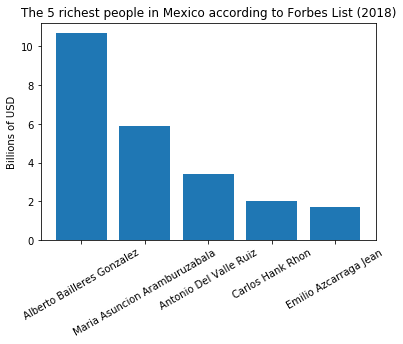

In [42]:
plot1_bar_x()

In [51]:
#country gdp compared to the average world's gdp

def country_gdp(dataframe, country):
    filter_country = df_forbeslist_gdp['country'] == country
    gdp_country_array = df_forbeslist_gdp[filter_country]['GDP_BUSD'].unique()
    gdp_country = gdp_country_array[0]
    gdp_unique = dataframe['GDP_BUSD'].unique()
    gdp_mean = round(gdp_unique.mean(), 1)
    list_country_gdp = [gdp_country, gdp_mean]
    return list_country_gdp

In [52]:
list_country_gdp = country_gdp(df_forbeslist_gdp, 'France')

In [53]:
label = ['France GDP', 'Average GDP']
BUSD = list_country_gdp

In [54]:
def plot2_bar_x():
    index = np.arange(len(label))
    plt.bar(index, BUSD)
    plt.ylabel('Billions of USD', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    country = label[0]
    plt.title(f'{country} compared to Average GDP (2018)')
    plt.show()

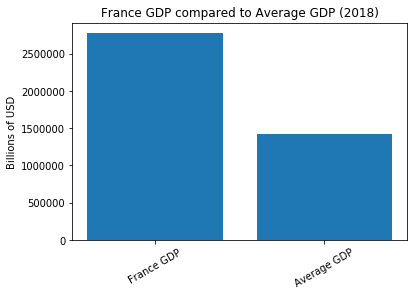

In [55]:
plot2_bar_x()

In [56]:
#gdp per capita compare to the average world's gdp per capita

def gdp_per_capita(dataframe, country):
    filter_country = df_forbeslist_gdp['country'] == country
    gdp_percapita_array = df_forbeslist_gdp[filter_country]['GDP_per_capita_USD'].unique()
    gdp_percapita = gdp_percapita_array[0]
    gdp_percapita_unique = dataframe['GDP_per_capita_USD'].unique()
    gdp_percapita_mean = round(gdp_percapita_unique.mean(), 1)
    list_gdp_percapita = [gdp_percapita, gdp_percapita_mean]
    return list_gdp_percapita

In [57]:
list_gdp_percapita = gdp_per_capita(df_forbeslist_gdp, 'China')

In [64]:
label = ['China GDP per capita', 'Average GDP']
BUSD = list_gdp_percapita

In [65]:
def plot3_bar_x():
    index = np.arange(len(label))
    plt.bar(index, BUSD)
    plt.ylabel('USD', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    country = label[0]
    plt.title(f'{country} compared to Average GDP per capita (2018)')
    plt.show()

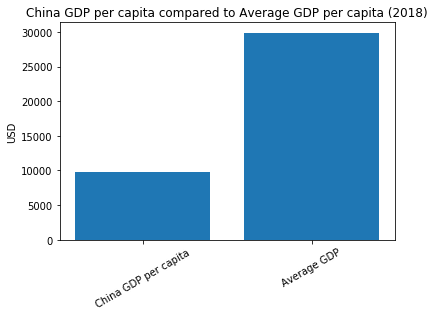

In [66]:
plot3_bar_x()